Problem Statement:
The objective of this study is to segment the similar user and similar items in to clusters. Understanding the common charecteristic of each group will help the organization to promote their bussiness.

The datasets used in this work contain measurements of clothing fit from RentTheRunway.

RentTheRunWay is a unique platform that allows women to rent clothes for various occasions; we collected data from several categories. These datasets contain self-reported fit feedback from customers as well as other side information like reviews, ratings, product categories, catalog sizes, customers’ measurements (etc.). In this datasets, fit feedback belongs to one of three classes: ‘Small,’ ‘Fit,’ and ‘Large.’

FILE DESCRIPTION These datasets contain measurements of clothing fit from RentTheRunway.

Number of users: 105,508
Number of items: 5,850
Number of transactions: 192,544
Metadata: 1. ratings and reviews 2. fit feedback (small/fit/large etc.) 3. user/item measurements 4. category information

Data Citation: Decomposing fit semantics for product size recommendation in metric spaces Rishabh Misra, Mengting Wan, Julian McAuley RecSys, 2018

Weblink for data: https://cseweb.ucsd.edu/~jmcauley/datasets.html#clothing_fit

We have altered this dataset by deriving some new columns which has been computed by applying text analytics statergies on the review column of data.

Appropriate features need to be selected for user segmentation(clustering) and Item Segmentation (clustering) process.

In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

In [97]:
pd.options.display.max_columns = None

In [98]:
df = pd.read_csv('final_cluster_data_cloth.csv')
df.head()

fit  user_id  item_id  weight  rating     rented for          body type  \
0  fit   420272  2260466  137lbs    10.0       vacation          hourglass   
1  fit   273551   153475  132lbs    10.0          other  straight & narrow   
2  fit   360448  1063761     NaN    10.0          party                NaN   
3  fit   909926   126335  135lbs     8.0  formal affair               pear   
4  fit   151944   616682  145lbs    10.0        wedding           athletic   

  category height  size    age  review_sum_Pol  review_sum_Subj  \
0   romper  5' 8"    14   28.0        0.625000         0.500000   
1     gown  5' 6"    12   36.0        0.000000         0.000000   
2   sheath  5' 4"     4  116.0        0.525000         0.541667   
3    dress  5' 5"     8   34.0        1.000000         1.000000   
4     gown  5' 9"    12   27.0        0.976562         0.600000   

   review_text__Pol  review_text_Subj  text_compound  text_neg  text_neu  \
0          0.181548          0.623810         0.9453     0.021     0.676   
1          0.360667          0.686667         0.8991     0.046     0.696   
2          0.489762          0.570476         0.9333     0.000     0.713   
3          0.213056          0.461556         0.9559     0.034     0.746   
4         -0.054028          0.320417         0.6239     0.014     0.936   

   text_pos  sum_compound  sum_neg  sum_neu  sum_pos     size1 size2  
0     0.303        0.9453      0.0    0.379    0.621  0.708333     d  
1     0.258        0.8991      0.0    0.387    0.613  0.708333     b  
2     0.287        0.9333      0.0    0.658    0.342       NaN   NaN  
3     0.219        0.9559      0.0    0.654    0.346  0.708333     c  
4     0.050        0.6239      0.0    0.542    0.458  0.708333     b

In [99]:
df.shape

(192544, 25)

In [100]:
df.isnull().sum()

fit                     0
user_id                 0
item_id                 0
weight              29982
rating                 82
rented for             10
body type           14637
category                0
height                677
size                    0
age                   960
review_sum_Pol          0
review_sum_Subj         0
review_text__Pol        0
review_text_Subj        0
text_compound           0
text_neg                0
text_neu                0
text_pos                0
sum_compound            0
sum_neg                 0
sum_neu                 0
sum_pos                 0
size1               18411
size2               18411
dtype: int64

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192544 entries, 0 to 192543
Data columns (total 25 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   fit               192544 non-null  object 
 1   user_id           192544 non-null  int64  
 2   item_id           192544 non-null  int64  
 3   weight            162562 non-null  object 
 4   rating            192462 non-null  float64
 5   rented for        192534 non-null  object 
 6   body type         177907 non-null  object 
 7   category          192544 non-null  object 
 8   height            191867 non-null  object 
 9   size              192544 non-null  int64  
 10  age               191584 non-null  float64
 11  review_sum_Pol    192544 non-null  float64
 12  review_sum_Subj   192544 non-null  float64
 13  review_text__Pol  192544 non-null  float64
 14  review_text_Subj  192544 non-null  float64
 15  text_compound     192544 non-null  float64
 16  text_neg          19

In [102]:
num = df.select_dtypes(include = np.number).columns
num

Index(['user_id', 'item_id', 'rating', 'size', 'age', 'review_sum_Pol',
       'review_sum_Subj', 'review_text__Pol', 'review_text_Subj',
       'text_compound', 'text_neg', 'text_neu', 'text_pos', 'sum_compound',
       'sum_neg', 'sum_neu', 'sum_pos', 'size1'],
      dtype='object')

In [103]:
cat = df.select_dtypes(include = np.object).columns
cat

Index(['fit', 'weight', 'rented for', 'body type', 'category', 'height',
       'size2'],
      dtype='object')

In [104]:
df = df.drop(['fit','rented for', 'body type', 'category','size2'], axis = 1)
df.head()

user_id  item_id  weight  rating height  size    age  review_sum_Pol  \
0   420272  2260466  137lbs    10.0  5' 8"    14   28.0        0.625000   
1   273551   153475  132lbs    10.0  5' 6"    12   36.0        0.000000   
2   360448  1063761     NaN    10.0  5' 4"     4  116.0        0.525000   
3   909926   126335  135lbs     8.0  5' 5"     8   34.0        1.000000   
4   151944   616682  145lbs    10.0  5' 9"    12   27.0        0.976562   

   review_sum_Subj  review_text__Pol  review_text_Subj  text_compound  \
0         0.500000          0.181548          0.623810         0.9453   
1         0.000000          0.360667          0.686667         0.8991   
2         0.541667          0.489762          0.570476         0.9333   
3         1.000000          0.213056          0.461556         0.9559   
4         0.600000         -0.054028          0.320417         0.6239   

   text_neg  text_neu  text_pos  sum_compound  sum_neg  sum_neu  sum_pos  \
0     0.021     0.676     0.303        0.9453      0.0    0.379    0.621   
1     0.046     0.696     0.258        0.8991      0.0    0.387    0.613   
2     0.000     0.713     0.287        0.9333      0.0    0.658    0.342   
3     0.034     0.746     0.219        0.9559      0.0    0.654    0.346   
4     0.014     0.936     0.050        0.6239      0.0    0.542    0.458   

      size1  
0  0.708333  
1  0.708333  
2       NaN  
3  0.708333  
4  0.708333

In [105]:
df.isnull().sum()

user_id                 0
item_id                 0
weight              29982
rating                 82
height                677
size                    0
age                   960
review_sum_Pol          0
review_sum_Subj         0
review_text__Pol        0
review_text_Subj        0
text_compound           0
text_neg                0
text_neu                0
text_pos                0
sum_compound            0
sum_neg                 0
sum_neu                 0
sum_pos                 0
size1               18411
dtype: int64

In [106]:
df['weight'] = df['weight'].replace({'lbs':''}, regex = True)

In [107]:
df.height.unique()

array(['5\' 8"', '5\' 6"', '5\' 4"', '5\' 5"', '5\' 9"', '5\' 3"',
       '5\' 2"', '5\' 7"', '5\' 1"', '5\' 10"', '6\' 0"', '4\' 10"',
       '6\' 1"', '5\' 11"', '5\' 0"', nan, '4\' 11"', '4\' 8"', '6\' 2"',
       '6\' 3"', '4\' 9"', '4\' 6"', '6\' 4"', '4\' 7"', '6\' 6"'],
      dtype=object)

In [108]:
df['height'] = df['height'].replace({"'":".",'"':''}, regex = True)

In [109]:
df['height'] = df['height'].replace({' ':''}, regex = True)

In [110]:
df.head()

user_id  item_id weight  rating height  size    age  review_sum_Pol  \
0   420272  2260466    137    10.0    5.8    14   28.0        0.625000   
1   273551   153475    132    10.0    5.6    12   36.0        0.000000   
2   360448  1063761    NaN    10.0    5.4     4  116.0        0.525000   
3   909926   126335    135     8.0    5.5     8   34.0        1.000000   
4   151944   616682    145    10.0    5.9    12   27.0        0.976562   

   review_sum_Subj  review_text__Pol  review_text_Subj  text_compound  \
0         0.500000          0.181548          0.623810         0.9453   
1         0.000000          0.360667          0.686667         0.8991   
2         0.541667          0.489762          0.570476         0.9333   
3         1.000000          0.213056          0.461556         0.9559   
4         0.600000         -0.054028          0.320417         0.6239   

   text_neg  text_neu  text_pos  sum_compound  sum_neg  sum_neu  sum_pos  \
0     0.021     0.676     0.303        0.9453      0.0    0.379    0.621   
1     0.046     0.696     0.258        0.8991      0.0    0.387    0.613   
2     0.000     0.713     0.287        0.9333      0.0    0.658    0.342   
3     0.034     0.746     0.219        0.9559      0.0    0.654    0.346   
4     0.014     0.936     0.050        0.6239      0.0    0.542    0.458   

      size1  
0  0.708333  
1  0.708333  
2       NaN  
3  0.708333  
4  0.708333

In [111]:
df.weight = df.weight.astype(float)

In [112]:
df.weight.describe()

count    162562.000000
mean        137.391709
std          21.899967
min          50.000000
25%         123.000000
50%         135.000000
75%         148.000000
max         300.000000
Name: weight, dtype: float64

In [113]:
df.weight.fillna(df.weight.mean(), inplace = True)

In [114]:
df.height = df.height.astype(float)

In [115]:
df.height.fillna(df.height.median(), inplace = True)

In [116]:
df.rating.describe()

count    192462.000000
mean          9.092371
std           1.430044
min           2.000000
25%           8.000000
50%          10.000000
75%          10.000000
max          10.000000
Name: rating, dtype: float64

In [117]:
df.rating.fillna(df.rating.median(), inplace = True)

In [118]:
df.age.describe()

count    191584.000000
mean         33.871017
std           8.058083
min           0.000000
25%          29.000000
50%          32.000000
75%          37.000000
max         117.000000
Name: age, dtype: float64

<AxesSubplot:>

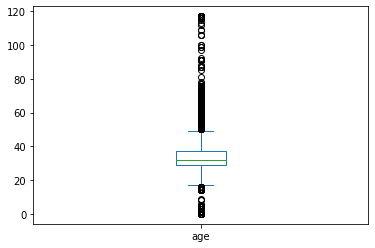

In [119]:
df.age.plot(kind = 'box')

In [120]:
df.age.fillna(df.age.median(), inplace = True)

<AxesSubplot:>

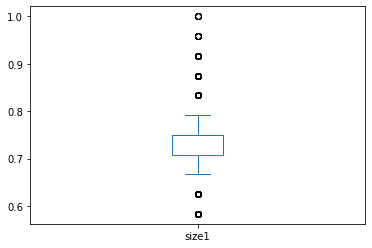

In [121]:
df.size1.plot(kind = 'box')

In [122]:
df.size1.describe()

count    174133.000000
mean          0.712526
std           0.036359
min           0.583333
25%           0.708333
50%           0.708333
75%           0.750000
max           1.000000
Name: size1, dtype: float64

In [123]:
df.size1.fillna(df.size1.median(), inplace = True)

In [124]:
df.isnull().sum()[df.isnull().sum()!=0]

Series([], dtype: int64)

In [125]:
df.head()

user_id  item_id      weight  rating  height  size    age  review_sum_Pol  \
0   420272  2260466  137.000000    10.0     5.8    14   28.0        0.625000   
1   273551   153475  132.000000    10.0     5.6    12   36.0        0.000000   
2   360448  1063761  137.391709    10.0     5.4     4  116.0        0.525000   
3   909926   126335  135.000000     8.0     5.5     8   34.0        1.000000   
4   151944   616682  145.000000    10.0     5.9    12   27.0        0.976562   

   review_sum_Subj  review_text__Pol  review_text_Subj  text_compound  \
0         0.500000          0.181548          0.623810         0.9453   
1         0.000000          0.360667          0.686667         0.8991   
2         0.541667          0.489762          0.570476         0.9333   
3         1.000000          0.213056          0.461556         0.9559   
4         0.600000         -0.054028          0.320417         0.6239   

   text_neg  text_neu  text_pos  sum_compound  sum_neg  sum_neu  sum_pos  \
0     0.021     0.676     0.303        0.9453      0.0    0.379    0.621   
1     0.046     0.696     0.258        0.8991      0.0    0.387    0.613   
2     0.000     0.713     0.287        0.9333      0.0    0.658    0.342   
3     0.034     0.746     0.219        0.9559      0.0    0.654    0.346   
4     0.014     0.936     0.050        0.6239      0.0    0.542    0.458   

      size1  
0  0.708333  
1  0.708333  
2  0.708333  
3  0.708333  
4  0.708333

In [126]:
df = df.drop(['user_id','item_id'], axis = 1)

In [127]:
df.head()

weight  rating  height  size    age  review_sum_Pol  review_sum_Subj  \
0  137.000000    10.0     5.8    14   28.0        0.625000         0.500000   
1  132.000000    10.0     5.6    12   36.0        0.000000         0.000000   
2  137.391709    10.0     5.4     4  116.0        0.525000         0.541667   
3  135.000000     8.0     5.5     8   34.0        1.000000         1.000000   
4  145.000000    10.0     5.9    12   27.0        0.976562         0.600000   

   review_text__Pol  review_text_Subj  text_compound  text_neg  text_neu  \
0          0.181548          0.623810         0.9453     0.021     0.676   
1          0.360667          0.686667         0.8991     0.046     0.696   
2          0.489762          0.570476         0.9333     0.000     0.713   
3          0.213056          0.461556         0.9559     0.034     0.746   
4         -0.054028          0.320417         0.6239     0.014     0.936   

   text_pos  sum_compound  sum_neg  sum_neu  sum_pos     size1  
0     0.303        0.9453      0.0    0.379    0.621  0.708333  
1     0.258        0.8991      0.0    0.387    0.613  0.708333  
2     0.287        0.9333      0.0    0.658    0.342  0.708333  
3     0.219        0.9559      0.0    0.654    0.346  0.708333  
4     0.050        0.6239      0.0    0.542    0.458  0.708333

In [136]:
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
iqr = q3 - q1

upper_lim = q3 + 1.5*iqr
lower_lim = q1 - 1.5*iqr

outliers = df[~((df<lower_lim)|(df>upper_lim)).any(axis = 1)]
outliers.shape

(128022, 18)

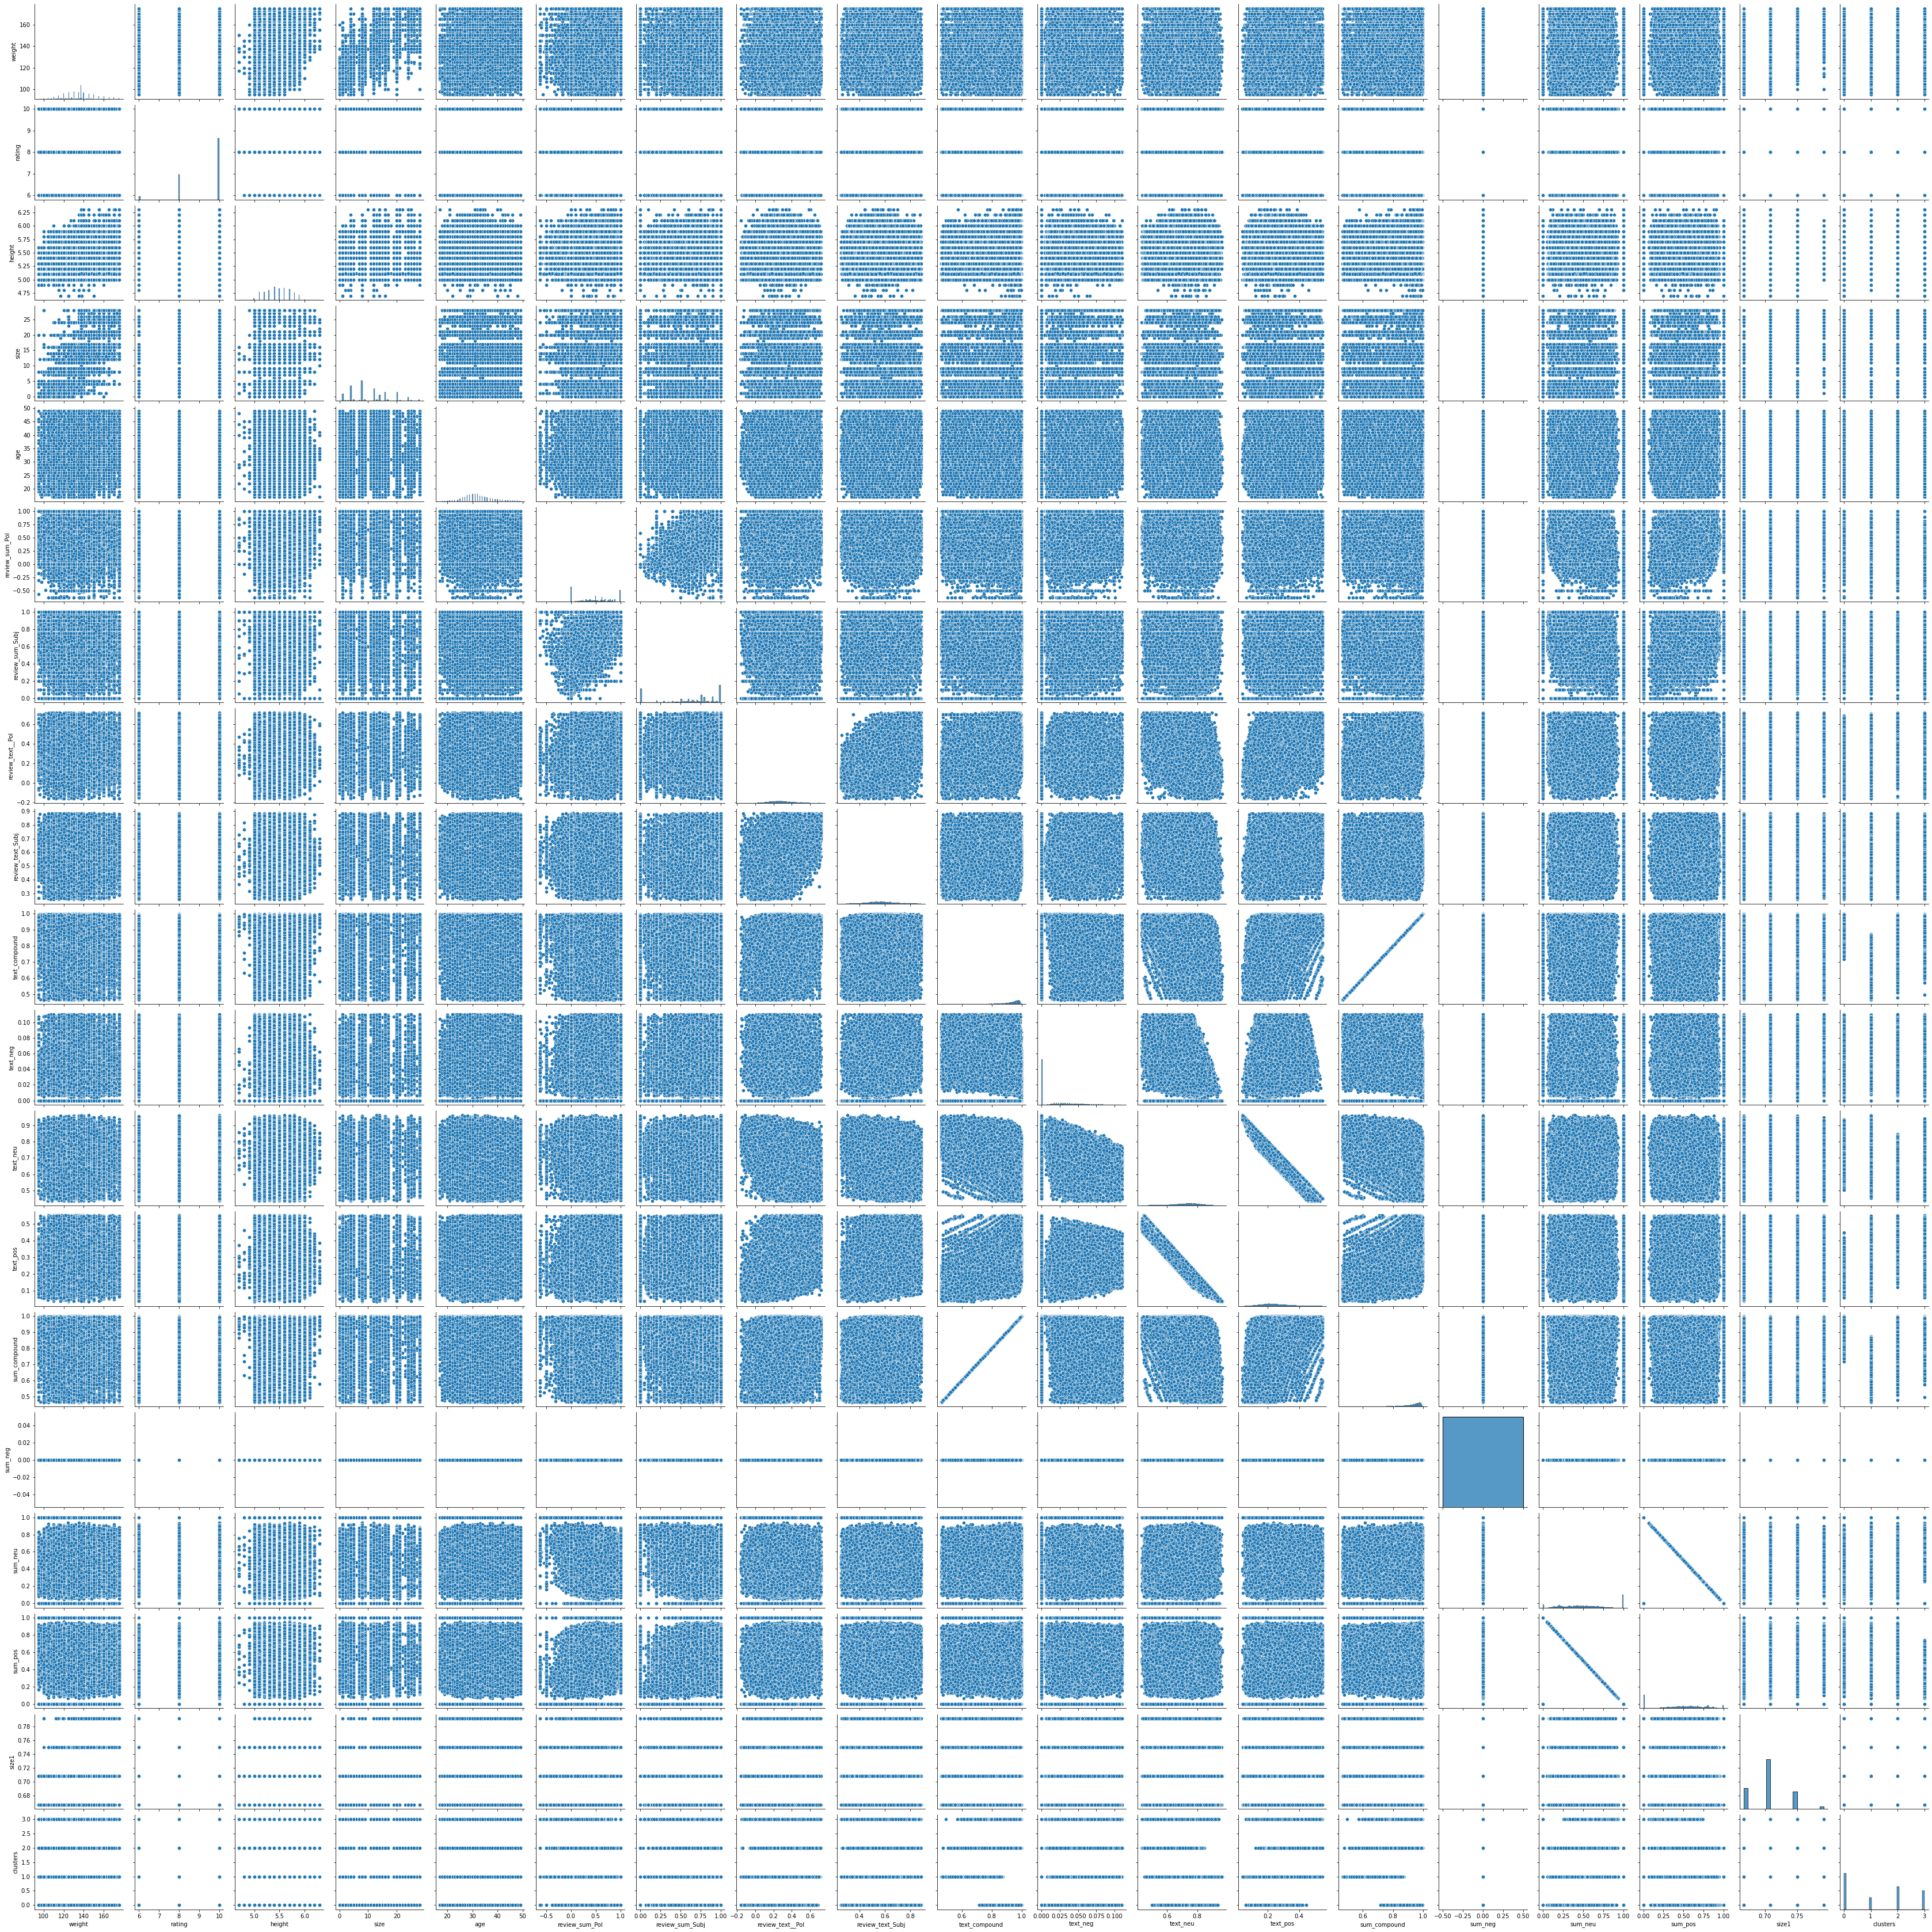

In [158]:
sns.pairplot(outliers)

## Lets Do Clustering

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [137]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

scaled = sc.fit_transform(outliers)

In [138]:
scaled

array([[ 0.15474856,  0.64357747,  1.31244792, ..., -0.46428474,
         0.46445542, -0.01215465],
       [-0.17634664,  0.64357747,  0.49003661, ..., -0.4355389 ,
         0.43570944, -0.01215465],
       [ 0.02231048, -1.16560711,  0.07883096, ...,  0.52385333,
        -0.52368755, -0.01215465],
       ...,
       [-2.2953559 ,  0.64357747, -1.56599165, ..., -1.24760874,
         1.2477833 , -1.39286591],
       [ 2.00888167,  0.64357747,  0.49003661, ..., -0.33492848,
         0.33509852,  1.36855664],
       [ 1.34669127,  0.64357747,  0.49003661, ...,  0.8256846 ,
        -0.82552032,  1.36855664]])

In [223]:
from sklearn.cluster import KMeans

wcss = []

n_clusters = np.arange(1,11)

for i in n_clusters:
    k = KMeans(n_clusters = i, random_state = 0)
    k.fit(scaled)
    wcss.append(k.inertia_)
    print('WCSS for {} clusters is {}'.format(i, np.round(k.inertia_,2)))

WCSS for 1 clusters is 2176374.0
WCSS for 2 clusters is 1894909.62
WCSS for 3 clusters is 1704069.42
WCSS for 4 clusters is 1573833.13
WCSS for 5 clusters is 1471828.04
WCSS for 6 clusters is 1431381.22
WCSS for 7 clusters is 1396951.5
WCSS for 8 clusters is 1364174.07
WCSS for 9 clusters is 1335099.78
WCSS for 10 clusters is 1309976.72


In [ ]:
wcss = []

n_clusters = np.arange(1,11)

for i in n_clusters:
    k = KMeans(n_clusters = i, random_state = 10)
    k.fit(scaled)
    wcss.append(k.inertia_)
    print('WCSS for {} clusters is {}'.format(i,np.round(k.inertia_,2)))

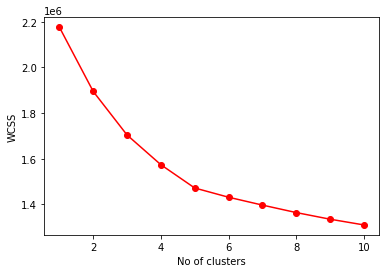

In [140]:
plt.plot(n_clusters, wcss, 'o-', color = 'red')
plt.xlabel('No of clusters')
plt.ylabel('WCSS')
plt.show()

In [152]:
k = KMeans(n_clusters = 4, random_state = 0)
labels = k.fit_predict(scaled)
outliers['labels'] = labels

In [177]:
outliers = outliers.drop('clusters', axis = 1)

In [178]:
k = KMeans(n_clusters = 2, random_state = 0)
labels = k.fit_predict(scaled)
outliers['clusters'] = labels

In [179]:
set(labels)

{0, 1}

<AxesSubplot:xlabel='age', ylabel='height'>

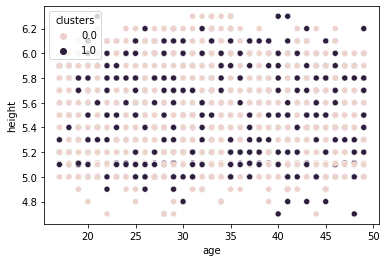

In [180]:
sns.scatterplot(x = df.age, y = df.height, hue = outliers.clusters)

## PCA

In [160]:
cov_matrix = pd.DataFrame(np.cov(scaled.T))

In [184]:
eig_value, eig_vector = np.linalg.eig(cov_matrix)

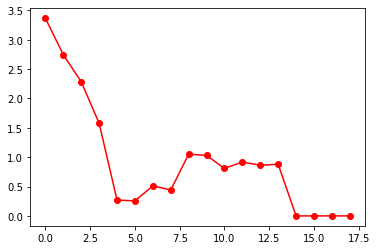

In [188]:
plt.plot(eig_value,'o-', color = 'red')
plt.show()

In [186]:
variation = []

for i in eig_value:
    variation.append(i/np.sum(eig_value)*100)

In [187]:
np.cumsum(variation)

array([ 19.79529601,  35.93483202,  49.36713248,  58.64801543,
        60.24349927,  61.7461024 ,  64.75699912,  67.35408119,
        73.53654588,  79.59690266,  84.35381969,  89.75122824,
        94.82532477,  99.99818163,  99.99996079, 100.        ,
       100.        , 100.        ])

In [196]:
vector = eig_vector[:,np.arange(0,13)]
pcs_data = pd.DataFrame(scaled.dot(vector), columns = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11',
                                                      'PC12','PC13'])

In [197]:
pcs_data.head()

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -0.970762  0.046055 -0.592920  0.550692  0.471697  0.577604 -0.071519   
1 -0.104712  1.209779 -0.244939 -0.699223  0.312590  0.361011 -0.047317   
2  0.242891 -0.780398  0.163482  1.331771 -0.337621  0.293452 -0.142050   
3  4.145939 -3.321986 -0.352193  0.062678 -0.017276  1.046774 -0.073725   
4  1.794440  1.601082  0.234083 -0.081648 -0.499966 -1.160942  1.029977   

        PC8       PC9      PC10      PC11      PC12      PC13  
0 -0.926419 -0.556280 -1.260234  0.275578  0.602366  0.256988  
1 -0.031907 -0.622776  0.371288  1.554699  0.758131  1.866018  
2  0.392963 -0.545991  0.492449 -1.881768  0.095293 -1.011150  
3 -0.050113  0.687592 -2.774101 -0.879712  0.362219 -0.047613  
4  0.456306  1.088692  0.540068 -1.829815  2.297552 -0.270531

In [ ]:
pc3, pc7

In [201]:
wcss = []

n_clusters = np.arange(1,11)

for i in n_clusters:
    k = KMeans(n_clusters = i, random_state = 0)
    t = k.fit(pcs_data)
    wcss.append(t.inertia_)
    print('WCSS for {} clusters is {}'.format(i, np.round(t.inertia_,2)))

WCSS for 1 clusters is 2063753.71
WCSS for 2 clusters is 1782342.91
WCSS for 3 clusters is 1591541.8
WCSS for 4 clusters is 1461572.71
WCSS for 5 clusters is 1359629.54
WCSS for 6 clusters is 1319396.77
WCSS for 7 clusters is 1285011.04
WCSS for 8 clusters is 1253193.75
WCSS for 9 clusters is 1224914.4
WCSS for 10 clusters is 1200053.18


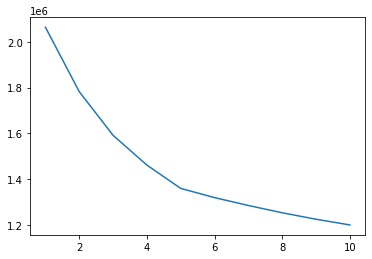

In [202]:
plt.plot(n_clusters, wcss)

In [208]:
outliers = outliers.drop('clusters', axis = 1)

In [205]:
outliers.head()

weight  rating  height  size   age  review_sum_Pol  review_sum_Subj  \
0   137.0    10.0     5.8    14  28.0        0.625000             0.50   
1   132.0    10.0     5.6    12  36.0        0.000000             0.00   
3   135.0     8.0     5.5     8  34.0        1.000000             1.00   
4   145.0    10.0     5.9    12  27.0        0.976562             0.60   
5   138.0     8.0     5.8     8  45.0        0.000000             0.75   

   review_text__Pol  review_text_Subj  text_compound  text_neg  text_neu  \
0          0.181548          0.623810         0.9453     0.021     0.676   
1          0.360667          0.686667         0.8991     0.046     0.696   
3          0.213056          0.461556         0.9559     0.034     0.746   
4         -0.054028          0.320417         0.6239     0.014     0.936   
5          0.308929          0.471429         0.8910     0.000     0.762   

   text_pos  sum_compound  sum_neg  sum_neu  sum_pos     size1  
0     0.303        0.9453      0.0    0.379    0.621  0.708333  
1     0.258        0.8991      0.0    0.387    0.613  0.708333  
3     0.219        0.9559      0.0    0.654    0.346  0.708333  
4     0.050        0.6239      0.0    0.542    0.458  0.708333  
5     0.238        0.8910      0.0    1.000    0.000  0.666667

In [209]:
k = KMeans(n_clusters = 4, random_state = 0)
labels = k.fit_predict(scaled)
outliers['clusters'] = labels

In [210]:
set(labels)

{0, 1, 2, 3}

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

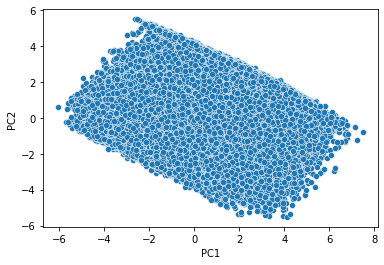

In [214]:
sns.scatterplot(pcs_data['PC1'],pcs_data['PC2'])

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

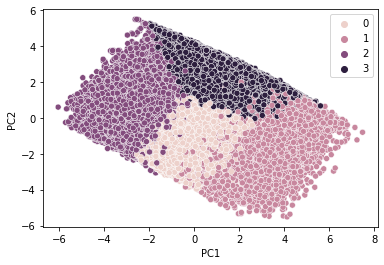

In [220]:
sns.scatterplot(pcs_data['PC1'],pcs_data['PC2'], hue = labels)